# Multilingual Text Dataset

This dataset contains blog posts labeled by language and by category.

In [1]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

/home/nesma/anaconda3/envs/ImageProcessingLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/nesma/anaconda3/envs/ImageProcessingLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


#### Import data in a dataframe.

In [2]:
dataset = pd.read_csv('data/dataset.csv', sep='\t', header=None).applymap(str)

#### Get the labels for languages

In [3]:
languages = dataset[dataset.columns[0]].unique()
languages

array(['english', 'albanian', 'arabic', 'bulgarian', 'chinese',
       'croatian', 'czech', 'danish', 'dutch', 'estonian', 'finnish',
       'french', 'german', 'greek', 'hebrew', 'hungarian', 'icelandic',
       'italian', 'japanese', 'korean', 'lithuanian', 'norwegian',
       'polish', 'portuguese', 'romanian', 'russian', 'serbian',
       'slovenian', 'spanish', 'swedish', 'turkish', 'ukrainian'],
      dtype=object)

#### Show the labels for categories

In [4]:
categories = dataset[dataset.columns[1]].unique()
len(categories)
categories

array(['advertising', 'agriculture', 'animation', 'arts_and_crafts',
       'entertainment', 'astrology', 'vehicles', 'games',
       'books_and_literature', 'business', 'gambling', 'jobs', 'clothing',
       'comic_books', 'dating', 'education', 'adult', 'food', 'health',
       'hobbies_and_interests', 'humor', 'illegal_content', 'investing',
       'jewelry', 'logistics', 'marketing', 'movies', 'music', 'hacking',
       'media', 'finance', 'pets', 'politics', 'religion',
       'sci_fi_and_fantasy', 'science', 'shopping', 'society', 'sports',
       'tech', 'teens', 'television', 'travel', 'under_construction',
       'weather'], dtype=object)

#### Create a dataframe containing the number of posts for any pair language/category

In [6]:
stats = pd.DataFrame(np.zeros([len(languages), len(categories)], dtype=int), index=[i for i in languages],
                     columns=[i for i in categories])

for _, row in dataset.iterrows():
    stats.loc[[row[0]], [row[1]]] += 1

####  Let's see how data is ditributed between labels

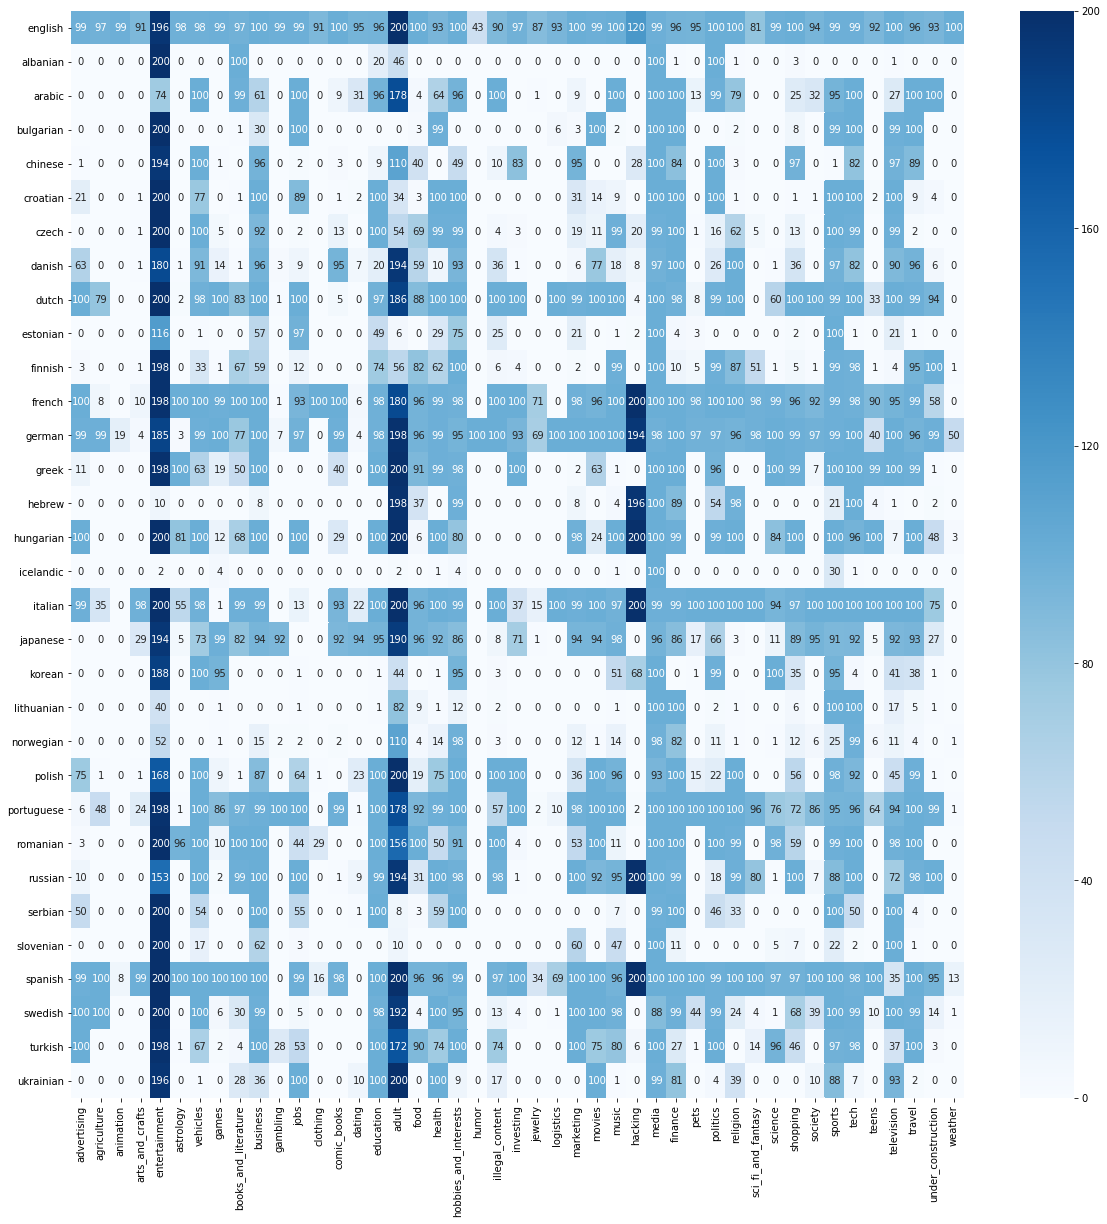

In [7]:
plt.figure(figsize=(20, 20))
sn.heatmap(stats, annot=True, cmap='Blues', fmt='g')
plt.show()

####  So now we have an inside look on how this dataset distribution is. It's obvious some category or language don't have much data so it's probably needed to discard it during use in any project.

In [5]:
dataset[2][30]

'By Oil Price – The rivalry between Saudi Arabia and Iran is becoming increasingly evident in the oil pricing policies of the two large Middle Eastern producers. The two countries are currently reigniting the market share…Vía Financial Sense https://ift.tt/2MLAiwt'

####  Rename Dataset Columns


In [6]:
dataset.columns = ["Language","Label","Text"]
dataset.head()


,Language,Label,Text
0,english,advertising,Exclusive: U.S. government seeks Facebook help...
1,english,advertising,Trump asks SEC to mull half-year corporate fil...
2,english,advertising,"Wall St. up on trade hopes, S&P equals longest..."
3,english,advertising,"Asian shares hit one-year low on Turkey, China..."
4,english,advertising,"Asian stocks weaken as Turkey worries weigh, d..."


####   Encode the labels of the dataset

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset["Label"] = label_encoder.fit_transform(dataset["Label"])

/home/nesma/anaconda3/envs/ImageProcessingLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/nesma/anaconda3/envs/ImageProcessingLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/nesma/anaconda3/envs/ImageProcessingLab/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


#### create a dataset for each language


In [8]:
languagesData=[]
loc = 0
for i in languages:
    name = languages[loc]+"Data" 
    globals()[name] = pd.DataFrame( dataset[dataset.Language == i])
    loc += 1
                        

#### Show sample from the datasets of french and spanish

In [9]:
print(frenchData.head())
print(spanishData.head())

      Language  Label                                               Text
20169   french      1  Home / GEEK / Le gouvernement américain interd...
20170   french      1  By OlivierLa puce la plus intéressante du lot ...
20171   french      1  Home / PEOPLE / Mélanie Da Cruz maman : Anthon...
20172   french      1  Arabie saoudite : plus de deux millions de fid...
20173   french      1  21 août 2018 à 10h16 | Par El Mehdi BerradaMoh...
      Language  Label                                               Text
55590  spanish      1  CIUDAD DE MÉXICO (apro).- Miguel Ángel Marín, ...
55591  spanish      1  Sigue la clausura de los Juegos Centroamerican...
55592  spanish      1  CIUDAD DE MÉXICO (apro).- Gerardo Axel “N”, ub...
55593  spanish      1  CIUDAD DE MÉXICO (apro).- En 2009, el movimien...
55594  spanish      1  CIUDAD DE MÉXICO (apro).- El Instituto de Veri...


In [10]:
len(englishData.Text)

4519

#### Prepare the English dataset to be trained

In [11]:
ESentences = englishData.Text
Ey = englishData.Label

#### Split the English dataset into train and test 

In [12]:
from sklearn.model_selection import train_test_split

Esentences_train, Esentences_test, Ey_train, Ey_test = train_test_split(
   ESentences, Ey, test_size=0.25, random_state=1000)

#### Tokenize the text

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Esentences_train)

EX_train = tokenizer.texts_to_sequences(Esentences_train)
EX_test = tokenizer.texts_to_sequences(Esentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index



#### Helping function for plotting the results

In [14]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

#### Pad the text with maxlen 100 and convert the labels to categorical

In [15]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

EX_train = pad_sequences(EX_train, padding='post', maxlen=maxlen)
EX_test = pad_sequences(EX_test, padding='post', maxlen=maxlen)

import keras
Ey_train = keras.utils.to_categorical(Ey_train)
Ey_test = keras.utils.to_categorical(Ey_test)

print(EX_train[0, :])


[   4   51  318 1388   12  596 1388 1445    5    4    1   44 1801 4255
  836    2  227  178    6    1  200  156    3 2844 1275  384    1 2772
   12   91 1244 1388  693    1   81  566    6  469    2   25  397  192
 1037 1244   11    1  743  593 2081 1960  902 1961   51  798  869  873
  351    4 1153 1678    6 1817   60  180   51   98 1244    1 1061   52
  924 3998   22 1041    1 1488  146  117 2422   17   71   63  381    3
  381    3 1116   11   17   49   13 3289 2265  681 2650   44  421 3999
    1 3933]


#### Input the text into the embedding layer, This model is a basic model 

In [107]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(45, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_19 (Embedding)     (None, 100, 50)           3867850   
_________________________________________________________________
flatten_9 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               500100    
_________________________________________________________________
dense_32 (Dense)             (None, 45)                4545      
Total params: 4,372,495
Trainable params: 4,372,495
Non-trainable params: 0
_________________________________________________________________


In [110]:
history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 9s 3ms/step - loss: 3.7037 - acc: 0.0915 - val_loss: 3.5361 - val_acc: 0.1177
Epoch 2/20
3389/3389 [==============================] - 7s 2ms/step - loss: 2.7988 - acc: 0.3461 - val_loss: 3.0688 - val_acc: 0.2097
Epoch 3/20
3389/3389 [==============================] - 7s 2ms/step - loss: 1.2701 - acc: 0.7878 - val_loss: 3.0007 - val_acc: 0.2230
Epoch 4/20
3389/3389 [==============================] - 7s 2ms/step - loss: 0.5622 - acc: 0.8474 - val_loss: 3.1044 - val_acc: 0.2301
Epoch 5/20
3389/3389 [==============================] - 8s 2ms/step - loss: 0.4225 - acc: 0.8669 - val_loss: 3.1577 - val_acc: 0.2354
Epoch 6/20
3389/3389 [==============================] - 7s 2ms/step - loss: 0.3669 - acc: 0.8696 - val_loss: 3.1246 - val_acc: 0.2407
Epoch 7/20
3389/3389 [==============================] - 7s 2ms/step - loss: 0.3374 - acc: 0.8740 - val_loss: 3.1027 - val_acc: 0.2407
Epoch 8/20
338

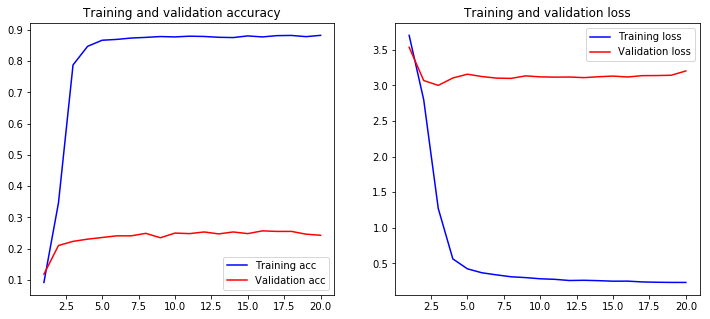

In [111]:
plot_history(history)

#### Using GloVe pretrained word embeddings

In [16]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [17]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'data/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

#### Using GRU and Pretrained Embeddings

In [146]:
from keras.layers import GRU,Dropout,BatchNormalization
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_39 (Embedding)     (None, 100, 50)           3867850   
_________________________________________________________________
gru_15 (GRU)                 (None, 256)               235776    
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 45)                11565     
Total params: 4,115,191
Trainable params: 4,115,191
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/10
3389/3389 [==============================] - 24s 7ms/step - loss: 3.7013 - acc: 0.0744 - val_loss: 3.5796 - val_acc: 0.0814
Epoch 2/10
3389/3389 [==============================] - 23s 7ms/step - loss: 3.3693 - acc: 0.1348 - val_loss: 3.2032 - val_acc: 0.1664
Epoch 3/10
3389/3389 [==============================] - 22s 6ms/step - loss: 2.9672 - acc: 0.2222 - val_loss: 2.9496 - val_acc: 0.2204
Epoch 4/10
3389/3389 [==============================] - 21s 6ms/step - loss: 2.6347 - acc: 0.2889 - val_loss: 2.8201 - val_acc: 0.2646
Epoch 5/10
3389/3389 [==============================] - 22s 6ms/step - loss: 2.3150 - acc: 0.3603 - val_loss: 2.5771 - val_acc: 0.3080
Epoch 6/10
3389/3389 [==============================] - 21s 6ms/step - loss: 2.0025 - acc: 0.4361 - val_loss: 2.4553 - val_acc: 0.3398
Epoch 7/10
3389/3389 [==============================] - 21s 6ms/step - loss: 1.7345 - acc: 0.4963 - val_loss: 2.4099 - val_acc: 0.3504
Epoch 8

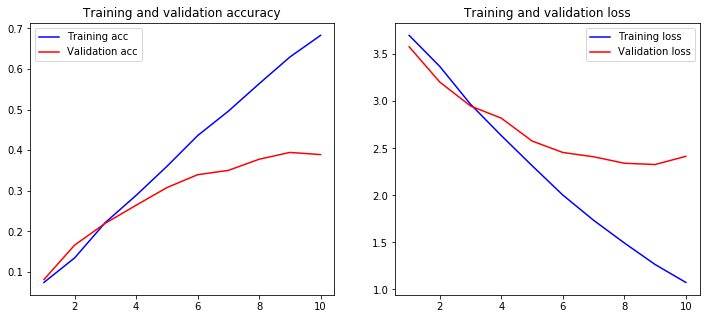

In [147]:
history = model.fit(EX_train, Ey_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Increase the number of epochs doesnot matter

Train on 3389 samples, validate on 1130 samples
Epoch 1/50
3389/3389 [==============================] - 20s 6ms/step - loss: 0.9705 - acc: 0.7043 - val_loss: 2.3918 - val_acc: 0.3982
Epoch 2/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.7992 - acc: 0.7616 - val_loss: 2.4278 - val_acc: 0.4053
Epoch 3/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.6707 - acc: 0.7976 - val_loss: 2.4267 - val_acc: 0.4115
Epoch 4/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.5642 - acc: 0.8244 - val_loss: 2.4813 - val_acc: 0.4133
Epoch 5/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.4869 - acc: 0.8327 - val_loss: 2.5569 - val_acc: 0.3982
Epoch 6/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.4098 - acc: 0.8560 - val_loss: 2.5878 - val_acc: 0.4106
Epoch 7/50
3389/3389 [==============================] - 19s 6ms/step - loss: 0.3814 - acc: 0.8590 - val_loss: 2.6490 - val_acc: 0.4106
Epoch 8

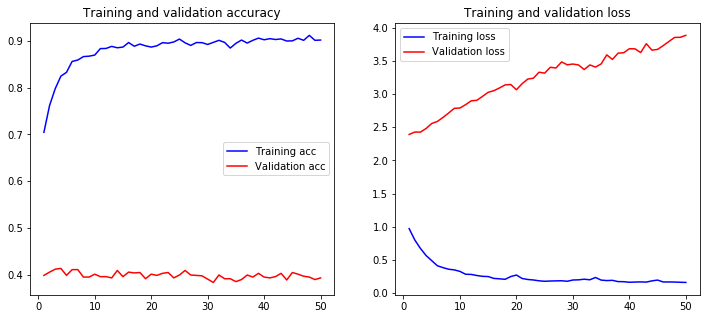

In [155]:
history = model.fit(EX_train, Ey_train,
                    epochs=50,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [39]:
from keras.models import Sequential
from keras import layers    
from keras.layers import Flatten, Dense, GRU,Dropout,BatchNormalization,RepeatVector,Permute
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256))
model.add(Dense(100, activation='tanh'))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 50)           3867850   
_________________________________________________________________
gru_15 (GRU)                 (None, 256)               235776    
_________________________________________________________________
dense_15 (Dense)             (None, 100)               25700     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 45)                4545      
Total params: 4,133,871
Trainable params: 4,133,871
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 27s 8ms/step - loss: 3.7129 - acc: 0.0741 - val_loss: 3.5888 - val_acc: 0.0991
Epoch 2/20
3389/3389 [==============================] - 25s 8ms/step - loss: 3.4517 - acc: 0.1216 - val_loss: 3.3667 - val_acc: 0.1451
Epoch 3/20
3389/3389 [==============================] - 26s 8ms/step - loss: 3.2011 - acc: 0.1821 - val_loss: 3.1258 - val_acc: 0.1858
Epoch 4/20
3389/3389 [==============================] - 26s 8ms/step - loss: 2.8926 - acc: 0.2414 - val_loss: 2.9392 - val_acc: 0.2372
Epoch 5/20
3389/3389 [==============================] - 26s 8ms/step - loss: 2.5669 - acc: 0.3051 - val_loss: 2.7806 - val_acc: 0.2549
Epoch 6/20
3389/3389 [==============================] - 27s 8ms/step - loss: 2.2507 - acc: 0.3898 - val_loss: 2.5900 - val_acc: 0.3009
Epoch 7/20
3389/3389 [==============================] - 26s 8ms/step - loss: 1.9827 - acc: 0.4521 - val_loss: 2.4921 - val_acc: 0.3372
Epoch 8

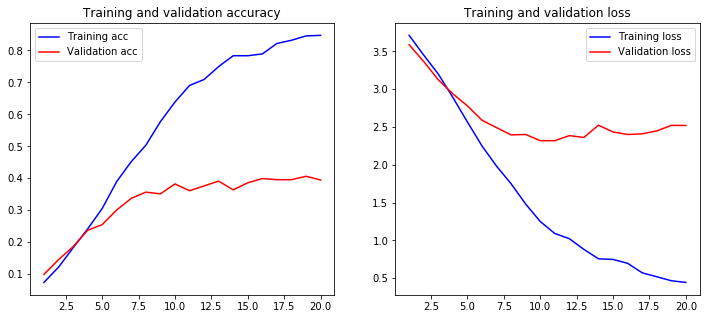

In [40]:
history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_27 (Embedding)     (None, 100, 50)           3867850   
_________________________________________________________________
gru_34 (GRU)                 (None, 100, 256)          235776    
_________________________________________________________________
dense_31 (Dense)             (None, 100, 256)          65792     
_________________________________________________________________
gru_35 (GRU)                 (None, 256)               393984    
_________________________________________________________________
dense_32 (Dense)             (None, 45)                11565     
Total params: 4,574,967
Trainable params: 4,574,967
Non-trainable params: 0
_________________________________________________________________
Train on 3389 samples, validate on 1130 samples
Epoch 1/20
3389/3389 [==============================] - 56s 16ms/step - loss: 3.6711

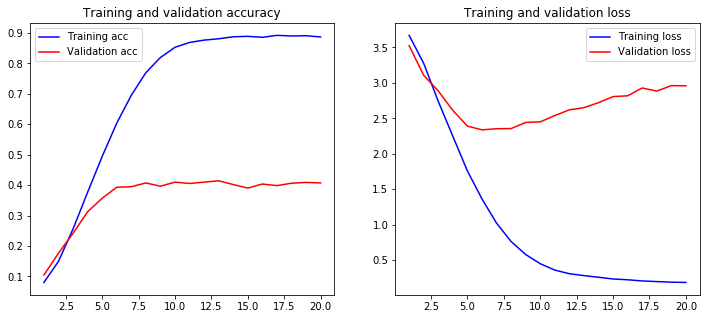

In [53]:
from keras.models import Sequential
from keras import layers    
from keras.layers import Flatten, Dense, GRU,Dropout,BatchNormalization,RepeatVector,Permute
from keras import regularizers

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(GRU(256, return_sequences=True))
# model.add(Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01),
#                 activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(256, activation='tanh'))
# let's encode this vector sequence into a single vector
model.add(GRU( 256, return_sequences=False))


# model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


history = model.fit(EX_train, Ey_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(EX_test, Ey_test))
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)




#### Another Implementation for word embeddings

In [168]:
from keras.layers import  Embedding
from keras.initializers import Constant
MAX_SEQUENCE_LENGTH = 100
embeddings_index = {}
with open("data/glove.6B.50d.txt") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

        
MAX_NUM_WORDS = 20000
EMBEDDING_DIM = 50
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))
for word, i in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector


In [169]:
from keras.layers import GRU,Dropout,BatchNormalization
model = Sequential()
model.add(layers.Embedding(num_words, embedding_dim, 
                           embeddings_initializer=Constant(embedding_matrix), 
                           input_length=MAX_SEQUENCE_LENGTH, 
                           trainable=True))
model.add(GRU(256))
model.add(Dropout(0.2))
model.add(layers.Dense(45, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_43 (Embedding)     (None, 100, 50)           1000050   
_________________________________________________________________
gru_17 (GRU)                 (None, 256)               235776    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 45)                11565     
Total params: 1,247,391
Trainable params: 1,247,391
Non-trainable params: 0
_________________________________________________________________


Train on 3389 samples, validate on 1130 samples
Epoch 1/10
3389/3389 [==============================] - 19s 5ms/step - loss: 3.7116 - acc: 0.0749 - val_loss: 3.5661 - val_acc: 0.1195
Epoch 2/10
3389/3389 [==============================] - 17s 5ms/step - loss: 3.4350 - acc: 0.1502 - val_loss: 3.2578 - val_acc: 0.1717
Epoch 3/10
3389/3389 [==============================] - 16s 5ms/step - loss: 3.0064 - acc: 0.2219 - val_loss: 2.9010 - val_acc: 0.2664
Epoch 4/10
3389/3389 [==============================] - 16s 5ms/step - loss: 2.6027 - acc: 0.2942 - val_loss: 2.7257 - val_acc: 0.2761
Epoch 5/10
3389/3389 [==============================] - 17s 5ms/step - loss: 2.2858 - acc: 0.3709 - val_loss: 2.5857 - val_acc: 0.3354
Epoch 6/10
3389/3389 [==============================] - 15s 5ms/step - loss: 1.9924 - acc: 0.4385 - val_loss: 2.5190 - val_acc: 0.3345
Epoch 7/10
3389/3389 [==============================] - 16s 5ms/step - loss: 1.7411 - acc: 0.4954 - val_loss: 2.4586 - val_acc: 0.3442
Epoch 8

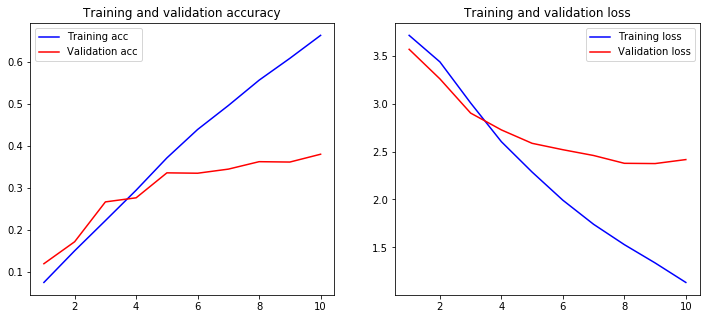

In [170]:
history = model.fit(EX_train, Ey_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(EX_test, Ey_test)
                   )
loss, accuracy = model.evaluate(EX_train, Ey_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(EX_test, Ey_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)